In [1]:
from striprtf.striprtf import rtf_to_text
import re
import pandas as pd
import numpy as np
import os


In [2]:
rtf_file_path =  "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Oxygen_electrode/.exp/20230427_Effect_of_light_intensity.rtf"
txt_file_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Oxygen_electrode/.exp/20230503_chlorella.txt"

In [3]:


with open(rtf_file_path) as infile:
    content = infile.read()
    text = rtf_to_text(content)

pattern = r"Enregistrement\s(\d{1,3})\s{6}(\S{8}).+\s(\d{1,3})\sµE.+\s(.+)"
data = re.findall(pattern, text)
df = pd.DataFrame(np.asarray(data), columns=["Record", "Real_time", "Light_intensity", "Comment"])
df.to_csv

<bound method NDFrame.to_csv of     Record Real_time Light_intensity Comment
0        1  15:50:53              15   blanc
1        2  15:56:01              15   blanc
2        3  16:05:41              15   blanc
3        4  16:06:19              15   blanc
4        5  16:07:15              50   blanc
..     ...       ...             ...     ...
98     197  18:13:39             380     380
99     198  18:14:10             390     390
100    199  18:14:30             400     400
101    200  18:14:59             420     420
102    201  18:16:22             450     450

[103 rows x 4 columns]>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools

In [4]:
importlib.reload(ExperimentClass)
manip = ExperimentClass.Experiment("20230427_effect_of_light_intensity", "Oxygen_electrode", local = "IBPC" , diff_xaxis = True)

In [5]:
np.where(manip.Data.keys() == " E 151")

(array([56], dtype=int64),)

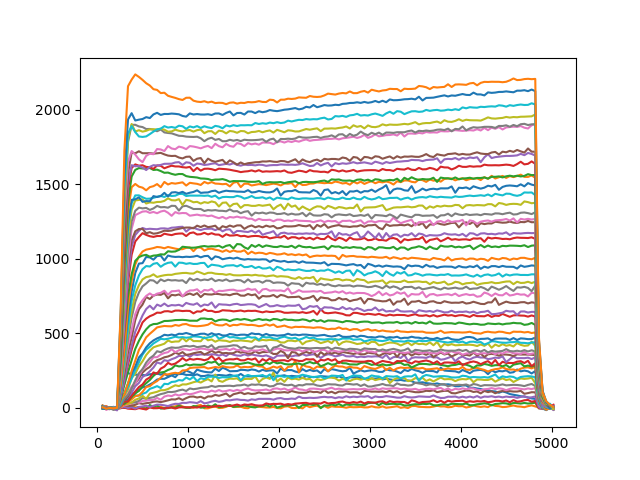

In [7]:
plt.figure()
for i in np.arange(55,56+51,1):
    plt.plot(manip.clean_times[i], manip.clean_data[i])